## Exercise 1 [20 баллов] ("eeeeeee")

На вход поступает непустая строка. Вам нужно посчитать максимальную длину последователости состоящей только из буквы "e" (русская буква).

__Примеры:__

```
eee_func("е ее еее") -> 3
eee_func("е ее еее") -> 3
eee_func("экзамен ееееее") -> 6
eee_func("праздники ееееееeeee") -> 10
eee_func("экзамен ееееее, а потом праздники ееееееeeee") -> 10
```


In [18]:
def eee_func(text): 
    list_from_text = text.split() 
    lengh_list = [] 
    for i in list_from_text: 
        unique_string = list(set(i)) 
        if (len(unique_string)==1 and "е" in unique_string): 
            lengh_list.append(len(i)) 
    max_ee = max(lengh_list) 
    return max_ee

Если вы написали функцию правильно, она пройдёт тесты ниже без ошибок. Если ваша функция прошла все тесты, это не означает, что она написана правильно. 

In [19]:
assert eee_func("е") == 1, "Test 1 Failed"
assert eee_func("е ее еее") == 3, "Test 2 Failed"
assert eee_func("экзамен ееееее") == 6, "Test 3 Failed"
assert eee_func("праздники ееееееееее") == 10, "Test 4 Failed"
assert eee_func("экзамен ееееее, а потом праздники ееееееееее") == 10, "Test 5 Failed"

print("OK. Good Job! Eeeee!")

OK. Good Job! Eeeee!


## Extrasize 2 [40 баллов] (учим других)

Перед вами данные с оценками различных приложений. Ваша задача - построить модель, которая сможет прогнозировать будет ли приложение обладать высоким рейтингом.

__Примечание:__ если данные не парсятся с гита, просто перейдите по ссылке и скачайте табличку на свой компьютер.

In [90]:
import pandas as pd 

url = "https://raw.githubusercontent.com/FUlyankin/ML_for_marketing/master/drafts/drafts/AppleStore.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


__а)__ оставьте в данных колонки `["price", "user_rating", "prime_genre", "lang.num", "size_bytes"]`

In [91]:
# Примерно 1 строчка кода 
df1 = df[["price", "user_rating", "prime_genre", "lang.num", "size_bytes"]]

__б)__ на базе колонки `user_rating` создайте колонку `is_popular`, запишите туда $1$, если рейтинг приложения больше 4. Иначе запишите 0. Колонку `user_rating` удалите. 

In [92]:
# Примерно 2 строчки кода
df1['is_popular'] = df1['user_rating'].apply(lambda x: 1 if x>4 else 0)
df1=df1.drop(['user_rating'], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
df1.head()

,price,prime_genre,lang.num,size_bytes,is_popular
1,3.99,Games,10,100788224,0
2,0.00,Productivity,23,158578688,0
3,0.00,Weather,3,100524032,0
4,0.00,Shopping,9,128512000,0
5,0.00,Reference,45,92774400,1


__в)__ Сделайте OHE-преобразование. Категориальной будет только колонка `prime_genre`.

In [94]:
# Примерно 1 строка кода 
from sklearn.preprocessing import OneHotEncoder
import numpy as np
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(np.asarray(list(df1['prime_genre'])).reshape(-1, 1)))
encoded_categorical_columns.columns = list(onehot_encoder.get_feature_names())
df2 = pd.concat([df1[['price', 'lang.num', 'size_bytes', 'is_popular']].reset_index(drop=True),encoded_categorical_columns],axis=1)
df2.head()

,price,lang.num,size_bytes,is_popular,x0_Book,x0_Business,x0_Catalogs,x0_Education,x0_Entertainment,x0_Finance,...,x0_News,x0_Photo & Video,x0_Productivity,x0_Reference,x0_Shopping,x0_Social Networking,x0_Sports,x0_Travel,x0_Utilities,x0_Weather
0,3.99,10,100788224,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,23,158578688,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,3,100524032,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.00,9,128512000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.00,45,92774400,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


__г)__ Выделите колонку `is_popular` в вектор $y$, а остальные колонки в матрицу $X$. Подгрузите метод `train_test_split`. Разбейте выборку на тренировочную и тестовую. 

In [95]:
# Примерно 4 строчки кода 
from sklearn.model_selection import train_test_split
y=list(df2['is_popular'])
X=df2.drop(['is_popular'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

__д)__ Обучите на тренировочной выборке две модели: случайный лес с $200$ деревьями и логистическую регрессию. 

In [99]:
# Примерно 6 строчек кода
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
model_logit = logit.fit(X, y)

__е)__ Постройте прогнозы для тестовой выборке. Нарисуйте для обоих алгоритмов ROC-кривые на одной картинке. Найдите площадь под ROC-кривой. Какой алгоритм показал более высокое качество? 

Logit: 0.4542921582946924
Random Forest: 0.5942087856115643
Random Forest имеет более высокую точность


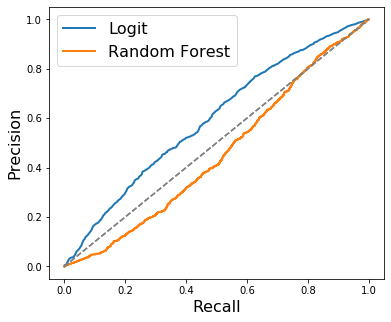

In [105]:
# Примерно 7 строчек кода
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
p_hat = model_rf.predict_proba(x_test)[:,-1]
roc_auc_score(y_test, p_hat)
pred = model_logit.predict_proba(x_test)[:,-1]

plt.figure(figsize=(6,5))

fpr, tpr, tres = roc_curve(y_test, p_hat)
plt.plot(fpr, tpr, lw=2, label='Logit')

fpr, tpr, tres = roc_curve(y_test, pred)
plt.plot(fpr, tpr, lw=2, label='Random Forest')

plt.plot([[0,0], [1,1]], linestyle='dashed', color='grey')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(fontsize=16)
print("Logit:", roc_auc_score(y_test, pred))
print("Random Forest:", roc_auc_score(y_test, p_hat))
print("Random Forest имеет более высокую точность")

__ё)__ Попробуйте подобрать для логистической регрессии сулу регуляризации `C` по решётке. Какое значение параметра оказалось самым лучшим? Найдите для самого хорошего алгоритма площадь под ROC-кривой на тестовой выборке. Удалось ли побить случайный лес?  

In [110]:
# Примерно 7 строчек кода
from sklearn.model_selection import GridSearchCV
c_range =  np.geomspace(0.001, 1000, 7)
param_grid = {'C': c_range}
gs = GridSearchCV(estimator=logit, cv=5, param_grid=param_grid, scoring='roc_auc', n_jobs = -1)
gs.fit(x_train, y_train)
gs.best_score_, gs.best_params_

(0.42343681839321007, {'C': 0.001})

In [111]:
logit1 = LogisticRegression(C=0.001)
model_logit1 = logit.fit(x_train, y_train)
pred1 = model_logit1.predict_proba(x_test)[:,-1]
print("площадь под ROC-кривой:" , roc_auc_score(y_test, pred1), "Лучшее значение параметра С=0.001. Результат не превзошел точность случайного леса.")

площадь под ROC-кривой: 0.4542921582946924 Лучшее значение параметра С=0.001. Результат не превзошел точность случайного леса.


__з)__ Своими словами опишите зачем обычно выборку разбивают на тренировочную и тестовую. Объясните что такое кросс-валидация и зачем её придумали. 

##### На тренировочной выборке происходит обучение модели (оценка параметров), на тестовой - прогнозирование с использованием уже оцененных параметров и оценка точности модели. Кросс-валидация - это метод  повторной  выборки и построения модели с целью оценки ее качества. Данные разбивают на несколько частей, для теста берут одну часть, остальные используют в качестве трейна, далее каждую часть используют для теста и объединяют оставшиеся в трейн. У каждой модели оценивают точность, таким образом получается обобщенное представление о точности модели.

"А где буква ж?" - спросите вы. Если бы мы выбросили букву ё, никто бы не спросил. А ей, между прочим, тоже обидно!

## Expecto Patronum 3 [40 баллов] (соскучились по мне?)

На страничке https://www.hse.ru/org/persons/ находится информация про сотрудников Вышки. Ваша задача спарсить её. Выберите свою любимую букву алфавита (конечно же такую, что на неё есть сотрудники на сайте). Напишите код, который соберёт все фамилии и имена преподавателей, а потом сохранит эту информацию в табличку формата `.csv`.

In [1]:
import requests  

url = 'https://www.hse.ru/org/persons/'
response = requests.get(url)
response

<Response [200]>

In [5]:
from bs4 import BeautifulSoup

tree = BeautifulSoup(response.content, 'html.parser')

In [27]:
tree.html.head.title

<title>Преподаватели и сотрудники — Национальный исследовательский университет «Высшая школа экономики»</title>

In [121]:
def get_page(p):
    
    
    url = 'https://www.hse.ru/org/persons/?ltr=У;udept=22726'.format(p)
    
    response = requests.get(url)
    
    tree = BeautifulSoup(response.content, 'html.parser')
    
    names = tree.find_all('a', {'class' : 'link link_dark large b'})
    
    infa = [ ]
    
    for name in names:
        infa.append({'teacher': name.div.get('title')})
                     
    return infa

In [122]:
infa = get_page(1)

In [123]:
import pandas as pd

df = pd.DataFrame(infa)
print(df.shape)
df['Фамилия'] = df['teacher'].apply(lambda x: x.split(" ")[0])
df['Имя'] = df['teacher'].apply(lambda x: x.split(" ")[1])
df = df.drop(columns={"teacher"})        #отчество нужно убрать по заданию
df.head()

(82, 1)


,Фамилия,Имя
0,Убоженко,Ирина
1,Уваров,Александр
2,Уваров,Павел
3,Уваров,Сергей
4,Уваров,Филипп


In [119]:
df.to_csv('teachers_parsing', sep='\t')